<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

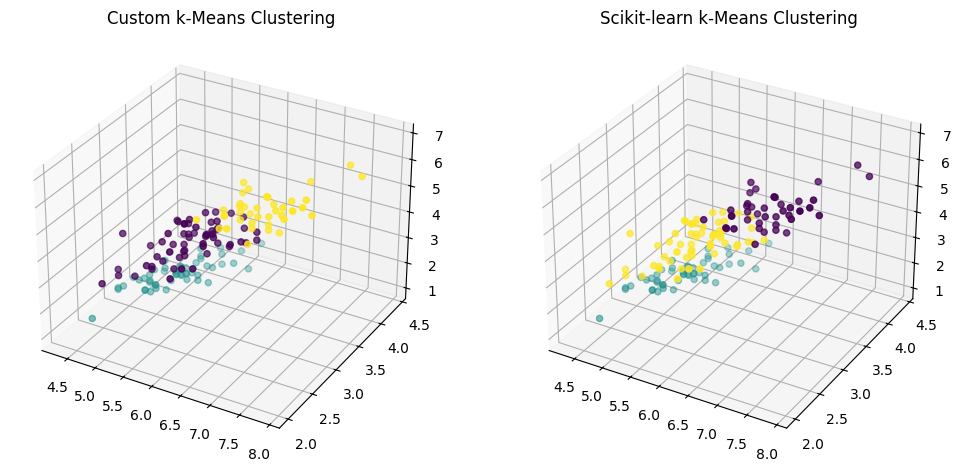

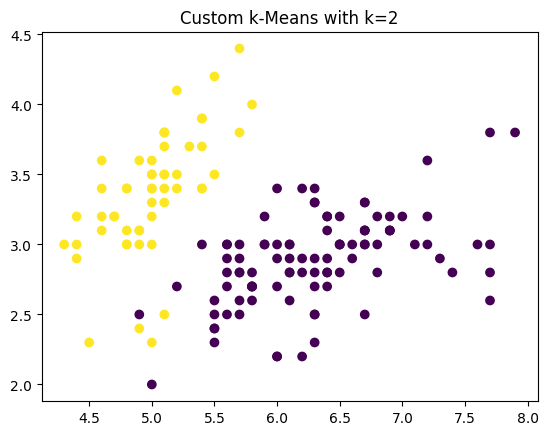

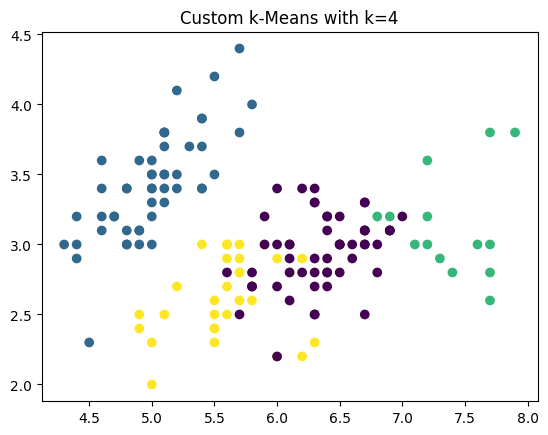

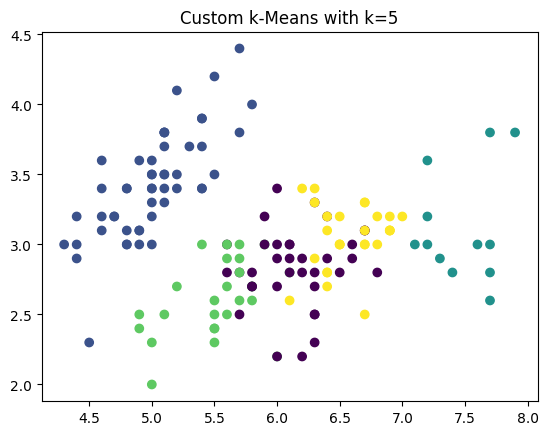

In [1]:
#Question 3

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]

# Implement custom k-means algorithm
def custom_kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Run custom k-means
clusters_custom, centroids_custom = custom_kmeans(X, k=3)

# Use sklearn's k-means for comparison
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
kmeans_sklearn.fit(X)
clusters_sklearn = kmeans_sklearn.labels_

# Plot results (3D scatter)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_custom, cmap='viridis', marker='o')
ax.set_title('Custom k-Means Clustering')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_sklearn, cmap='viridis', marker='o')
ax2.set_title('Scikit-learn k-Means Clustering')
plt.show()

# Explore effect of varying number of clusters
for k in [2, 4, 5]:
    clusters, _ = custom_kmeans(X, k)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title(f'Custom k-Means with k={k}')
    plt.show()
